<a href="https://colab.research.google.com/github/rupeshthapa123/NotebookProject/blob/main/RupeshThapa_InfectiousDiseaseModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Applications of Eigenvalues and Eigenvectors

### Infectious disease model

For the $SIRS$ model of infectious disease, we had the following discrete dynamical system.


$$
\begin{equation}
X_t = \left[ \begin{array}{r} s_t \\ i_t \\ r_t  \end{array}\right] =
\left[ \begin{array}{rrr} 0.95 & 0 & 0.15 \\ 0.05 & 0.80 & 0 \\ 0 & 0.20 & 0.85 \end{array}\right]
\left[ \begin{array}{r} s_{t-1} \\ i_{t-1} \\ r_{t-1}  \end{array}\right]=
AX_{t-1}
\end{equation}
$$

Given an initial condition $X_0$, we know that $X_n = A^nX_0$.  We are interested in determining the behavior of the system for large $n$.  We might now recognize that this calculation is exactly the same as the Power Method from the previous section, and therefore expect that the sequence of vectors produced should tend toward the eigenvector corresponding to the largest eigenvalue.

In this case the components of the vector have individual meaning, so let's calculate the first $20$ iterations and plot $s_t$, $i_t$, and $r_t$ to get a sense of how they are changing.  For this calculation we store each vector $X_t$ as a column in an array named $\texttt{results}$.

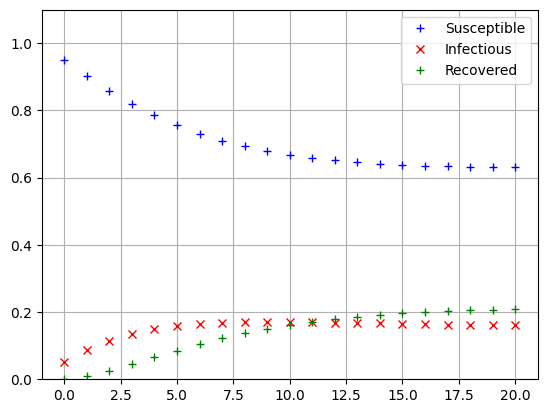

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

A = np.array([[0.95, 0, 0.15],[0.05,0.8,0],[0,0.2,0.85]])

## T is final time
T = 20
## X at time 0
X = np.array([[0.95],[0.05],[0]])

## The first column of results contains the initial values
results = np.copy(X)

for i in range(T):
    X = A@X
    results = np .hstack((results,X))

## t contains the time indices 0, 1, 2, ..., T
t = np.linspace(0,T,T+1)
## s, i, r values are the rows of the results array
s = results[0,:]
i = results[1,:]
r = results[2,:]

fig,ax = plt.subplots()

## The optional label keyword argument provides text that is used to create a legend
ax.plot(t,s,'b+',label="Susceptible")
ax.plot(t,i,'rx',label="Infectious")
ax.plot(t,r,'g+',label="Recovered")

ax.set_ylim(0,1.1)
ax.grid(True)
ax.legend()

From the image, the population reaches an *equilibrium* after 20 weeks.  In the equilibrium state, each category of the population, $S$, $I$, and $R$, have as many individuals entering the category as leaving it.

If $X$ is the vector that contains the equilibrium values of $s_t$, $i_t$, and $r_t$, then $X$ must be a solution to the equation $AX=X$, since $X_{t-1}=X_t$ when the components are not changing.  This implies that $X$ is an eigenvector of $A$ corresponding to an eigenvalue of one.  


Rearranging the linear system $AX=X$ we have,
$$X=IX$$
where $I$ is the identity matrix, then
$$AX=IX$$
which can be rewritten as $$(A-I)X = 0$$

This equation look similar to another known $$(A-\lambda I)X=0$$

The system $(A-I)X = 0$ is a Homogeneous System wich contains the trivial solution $X=0$.  Therefore if there is also a nonzero solution to $(A-I)X=0$, the system must have an infinite number of solutions since linear systems always have zero, exactly one, or an infinite number of solutions.  

If the system $(A-I)X=0$ does not have a unique solution there must be a free variable, which means that one of the columns of the matrix $A-I$ will not have a pivot.

In this case the direct methods of solution based on $LU$ or $QR$ factorizations will fail.  We must go back to the basic row operations and calculate the (Reduced Row Echelon Form) RREF of the augmented matrix $[(A-I)|0]$.  

Reducing the system by rows (RREF) gives us

$$
\begin{equation}
\left[ \begin{array}{rrr} 1 & 0 & -3 & 0 \\ 0 & 1 & -0.75 & 0 \\ 0 & 0 & 0 & 0 \end{array}\right]
\end{equation}
$$

In the reduced system for the equilibrium values $s$, $i$, and $r$, we can take $r$ as the free variable and write $s=3r$ and $i=0.75r$.  For any value of $r$, a vector of the following form is an eigenvector for $A-I$, corresponding to the eigenvalue one.

$$
\begin{equation}
r\left[ \begin{array}{r} 3 \\ 0.75 \\ 1  \end{array}\right]
\end{equation}
$$

Although this eigenvector is not unique, there is one more constraint on our equilibrium values that we have not yet addressed.  The variables $s$, $i$, and $r$ represent percentages of the population in each category, therefore we must also require that $s+i+r = 1$ in order for the results to be meaningful in the application.  This gives the equation $3r + 0.75r + r = 1$, which gives the unique equilibrium values of $r = 4/19$, $s=12/19$, and $i=3/19$.  If we carry out a large number of iterations, we see that the computed values are very close to the theoretical equilibrium values.

In [ ]:
## T is final time
T = 100
## X at time 0
X = np.array([[0.95],[0.05],[0]])

for i in range(T):
    X = A@X

print("Expected values of s, i, r:")
print("s =",12/19,"i =", 3/19,"r =", 4/19,'\n')
print("Computed values of s, i, r at time ",T,":")
print(X)


Expected values of s, i, r:
s = 0.631578947368421 i = 0.15789473684210525 r = 0.21052631578947367 

Computed values of s, i, r at time  100 :
[[0.63157895]
 [0.15789474]
 [0.21052632]]


The results agree nicely with our analysis, but there are two remaining questions:

1. Why is it that $s_t+i_t+r_t = 1$ for every $t$ in the calculation, even though this constraint does not appear to be enforced?
2. What are the results if we change the initial population composition given by $X_0$?

The answer to the first question is simple, but not immediately obvious.  If we add the three equations that define $s_t$, $i_t$, and $r_t$, we find that $s_t+i_t+r_t = s_{t-1} + i_{t-1} + r_{t-1}$.  This means that as long as the three equations are true, the sum $s_t+i_t+r_t$ does not change as we carry the iteration forward in time.  Since we start with the components of $X_0$ summing to one, the components of $X_t$ will sum to one for all other $t$.

In order to answer the second question, we assume that we start with an arbitrary $X_0$, although we will require that the components of $X_0$ to be nonnegative and add to one so that the results are meaningful in the application.  As we did when considering the Power Method, we write $X_0$ as a linear combination of $\{V_1, V_2, V_3\}$, the eigenvectors of $A$.  This makes  it easy to express $X_t = A^tX_0$ in terms of the eigenvectors as well, just as did before.

$$
\begin{eqnarray*}
X_0 & = & c_1V_1 + c_2V_2 + c_3V_3 \\
X_t & = & c_1\lambda_1^tV_1 + c_2\lambda_2^tV_2 + c_3\lambda_3^tV_3
\end{eqnarray*}
$$

Based on the results of our calculations, we expect that $\lambda_1 = 1$ is the largest eigenvalue.

$$
\begin{equation}
X_t  =  c_1V_1 + c_2\lambda_2^tV_2 + c_3\lambda_3^tV_3
\end{equation}
$$

If $|\lambda_2|< 1$ and $|\lambda_3|< 1$ then the second and the third terms will approach zero as $t$ gets large and $X_t$ will approach the direction of $V_1$.  We use SciPy to verify that $\lambda_2$ and $\lambda_3$ are in fact a pair of complex numbers with magnitude less than one.

In [ ]:
import scipy.linalg as sla

EVAL, EVEC = sla.eig(A)

print(EVAL,'\n')
## The absolute function finds the absolute value of real numbers, or magnitude of complex numbers.
print(np.absolute(EVAL[1]))
print(np.absolute(EVAL[1]))
print(np.absolute(EVAL[2]))

[1. +0.j         0.8+0.08660254j 0.8-0.08660254j] 

0.8046738469715539
0.8046738469715539
0.8046738469715539


Therefore unless $c_1 = 0$, the vectors $X_t$ approach the direction of $V_1$.  The case where $c_1 = 0$ corresponds to initial conditions with negative entries, which are not relevant in the application.  The conclusion is that $X_t$ will approach the equilibrium state for all meaningful initial configurations of the population.

### Exercises

**Exercise 1:** Experiment with a range of initial conditions in the infectious disease model to provide evidence that an equilibrium state is reached for all meaningful initial states.

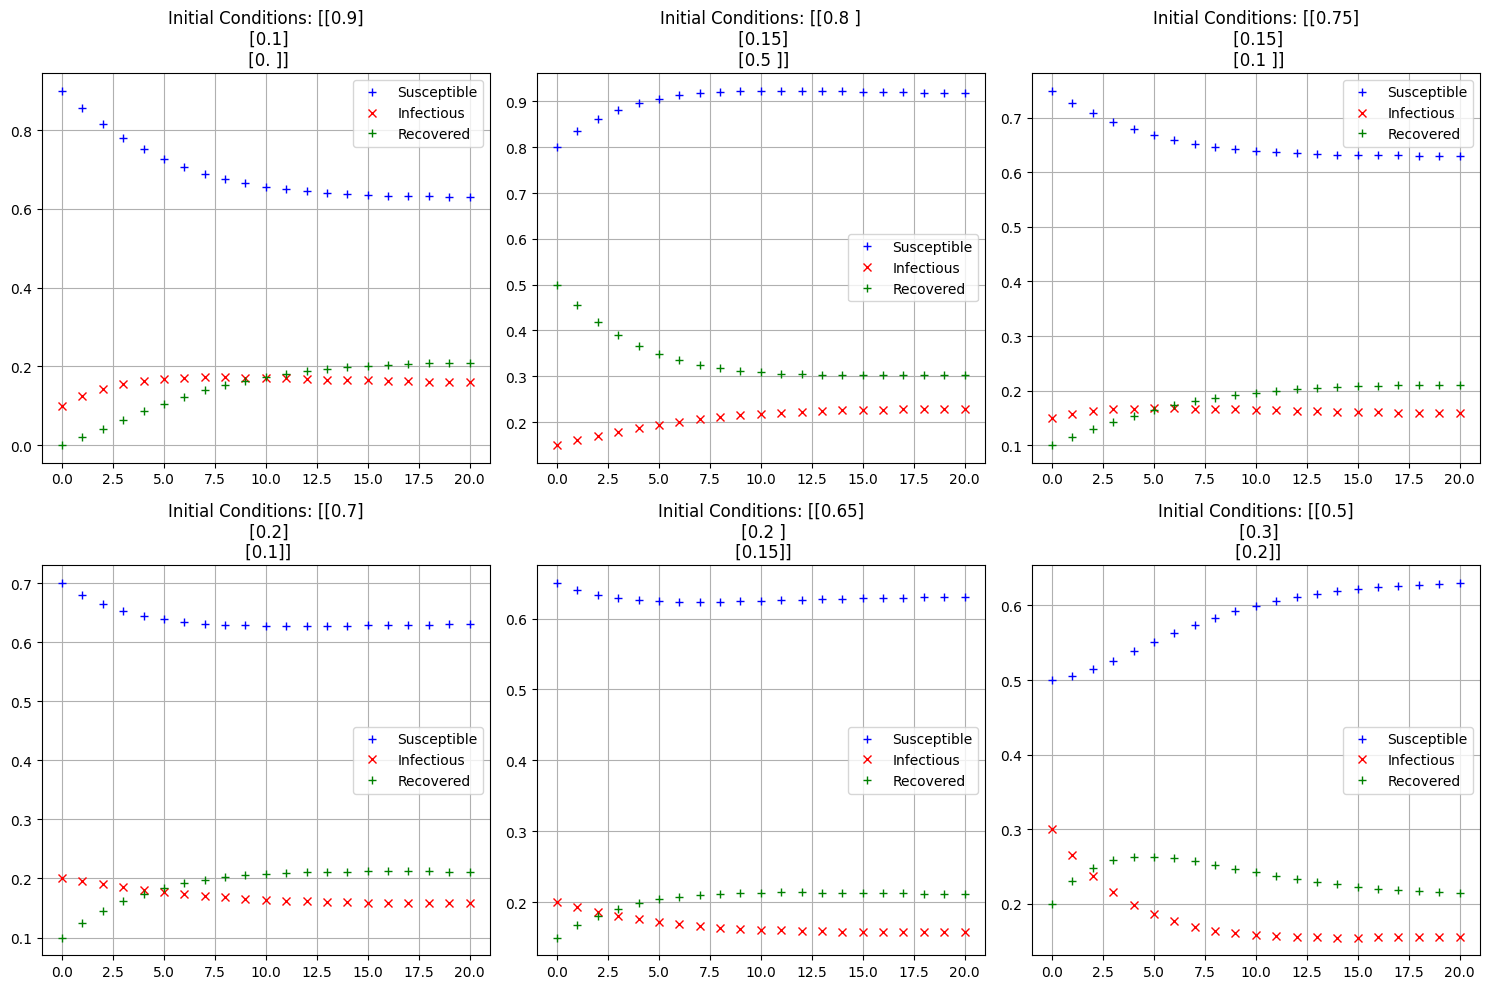

In [ ]:
## Code solution here.
## T is final time
T = 20
## X at time 0
X =  [
    np.array([[0.90],[0.10],[0]]),
    np.array([[0.80],[0.15],[0.5]]),
    np.array([[0.75],[0.15],[0.10]]),
    np.array([[0.70],[0.20],[0.10]]),
    np.array([[0.65],[0.20],[0.15]]),
    np.array([[0.50],[0.30],[0.20]])
]


fig, axs = plt.subplots(2,3, figsize=(15,10))

for data in range(len(X)):
  X_n = np.copy(X[data])
  results = np.copy(X_n)

  ## The first column of results contains the initial values
  for i in range(T):
    X_n = A@X_n
    results = np.hstack((results,X_n))

  ## t contains the time indices 0, 1, 2, ..., T
  t = np.linspace(0,T,T+1)
  ## s, i, r values are the rows of the results array
  s = results[0,:]
  i = results[1,:]
  r = results[2,:]

  row = data // 3
  col = data % 3
  ## The optional label keyword argument provides text that is used to create a legend
  axs[row, col].plot(t,s,'b+',label="Susceptible")
  axs[row, col].plot(t,i,'rx',label="Infectious")
  axs[row, col].plot(t,r,'g+',label="Recovered")
  axs[row, col].set_title(f'Initial Conditions: {X[data]}')
  axs[row, col].grid(True)
  axs[row, col].legend()

plt.tight_layout()
plt.show()

**Exercise 2:** Perform an analysis similar to that in the example for the following infectious disease model.  In this model the rate at which individuals move from the Recovered category to the Susceptible category is less than that in the example.  Make a plot similar to that in the example and also calculate the theoretical equilibrium values for $s$, $i$, and $r$.

$$
\begin{equation}
X_t = \left[ \begin{array}{r} s_t \\ i_t \\ r_t  \end{array}\right] =
\left[ \begin{array}{rrr} 0.95 & 0 & 0.05 \\ 0.05 & 0.80 & 0 \\ 0 & 0.20 & 0.95 \end{array}\right]
\left[ \begin{array}{r} s_{t-1} \\ i_{t-1} \\ r_{t-1}  \end{array}\right]=
AX_{t-1}
\end{equation}
$$

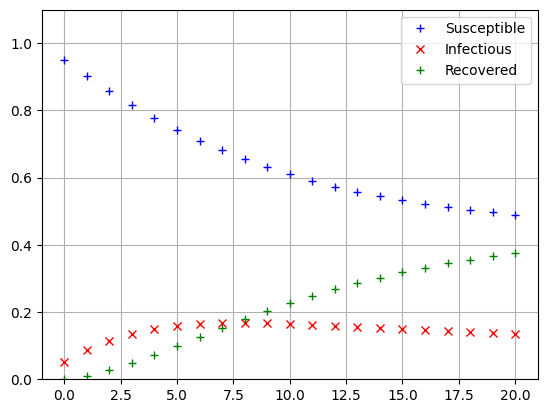

In [ ]:
## Code solution here.
A = np.array([[0.95, 0, 0.05],[0.05,0.80,0],[0,0.2,0.95]])

T = 20
X = np.array([[0.95],[0.05],[0]])

results = np.copy(X)

for i in range(T):
    X = A@X
    results = np .hstack((results,X))

t = np.linspace(0,T,T+1)

s = results[0,:]
i = results[1,:]
r = results[2,:]

fig,ax = plt.subplots()


ax.plot(t,s,'b+',label="Susceptible")
ax.plot(t,i,'rx',label="Infectious")
ax.plot(t,r,'g+',label="Recovered")

ax.set_ylim(0,1.1)
ax.grid(True)
ax.legend()

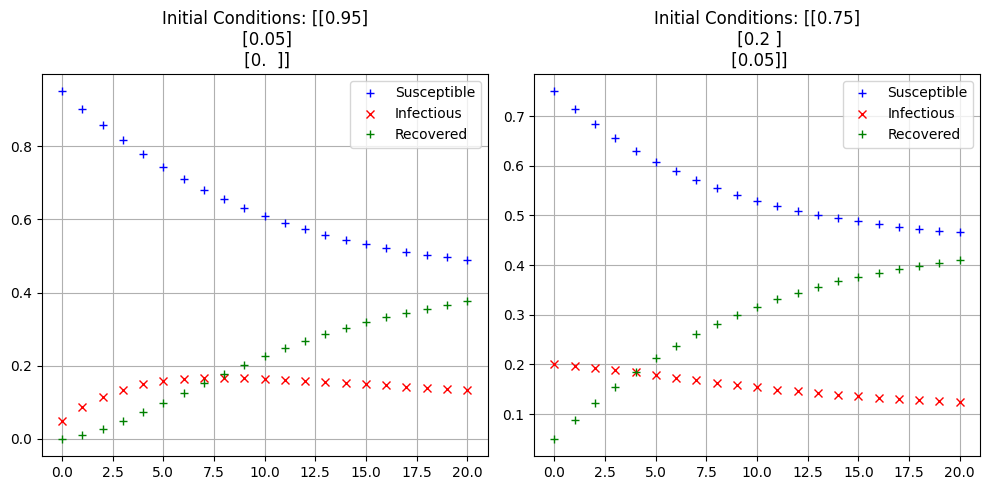

In [ ]:
A = np.array([[0.95, 0, 0.05],[0.05,0.80,0],[0,0.2,0.95]])

T = 20
SIRS = [
     np.array([[0.95],[0.05],[0]]),
     np.array([[0.75],[0.20],[0.05]])
]

fig, axs = plt.subplots(1,2, figsize=(10,5))

for data in range(len(SIRS)):
  X_n = np.copy(SIRS[data])
  results = np.copy(X_n)

  ## The first column of results contains the initial values
  for i in range(T):
    X_n = A@X_n
    results = np.hstack((results,X_n))

  ## t contains the time indices 0, 1, 2, ..., T
  t = np.linspace(0,T,T+1)
  ## s, i, r values are the rows of the results array
  s = results[0,:]
  i = results[1,:]
  r = results[2,:]

  #
  ## The optional label keyword argument provides text that is used to create a legend
  axs[data].plot(t,s,'b+',label="Susceptible")
  axs[data].plot(t,i,'rx',label="Infectious")
  axs[data].plot(t,r,'g+',label="Recovered")
  axs[data].set_title(f'Initial Conditions: {SIRS[data]}')
  axs[data].grid(True)
  axs[data].legend()

plt.tight_layout()
plt.show()